# TP 3: Clasificación: Mushrooms

### Desarrollaremos un trabajo de clasificación de variables categóricas en base al Dataset Mushrooms descargado desde Kagel, el cual clasifica  una muestra de hongos en base propiedades fisicas relevando si son venenosos o comestibles. 


### Al comenzar imporatamos las librerias y modulos que usaremos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score

#### Importamos el dataset con el que vamos a trabajar, lo cargamos una variable DataFrame y realizamos un Análisis Exploratorio

In [2]:
df = pd.read_csv('mushrooms.csv')
df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1795,p,f,y,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,v,g
6334,p,x,s,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
6843,p,k,y,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
5467,p,f,s,w,t,f,f,c,b,w,...,s,w,w,p,w,o,p,h,v,u
3859,p,x,f,w,f,c,f,w,n,n,...,s,w,w,p,w,o,p,n,v,d
6100,p,x,s,n,f,f,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
7672,p,k,y,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d
6729,p,f,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
1120,e,x,f,w,f,n,f,w,b,p,...,s,w,w,p,w,o,e,k,s,g
4421,p,x,f,y,f,f,f,c,b,p,...,k,p,b,p,w,o,l,h,y,d


In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Aplicamos un info para conocer el tamaño del dataset, sus cols, y cuan completo se encuentra:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Encontramos un dataset con un tamaño de 8124 registros u observaciones, 23 columnas y sin registros incompletos 

#### Hacemos un conteo de sobre la variable objetivo de clase para conocer cuan desbalanceada se encuentra la muestra respecto de las clases

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Por lo expuesto la muestra se encuentra bastante balanceada, dando _Comestibles = 51,8% y Venenosos = 48,2%_

### A continuación mostramos un detalle de los valores que pueden tomar las diferentes variables de atributos "Features" y renombramos la columnas para una mejor compresión:

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [6]:
df.rename(columns={ 'cap-shape': 'forma-del-gorro', 
                   'cap-surface': 'superficie-del-gorro',
                   'cap-color': 'color-del-gorro',
                   'bruises': 'manchas',
                   'odor': 'olor',
                   'gill-attachment': 'fijacion-entre-branquias',
                   'gill-spacing': 'espacio-entre-branquias',
                   'gill-size': 'tamaño-de-branquia',
                   'gill-color': 'color-de-branquia',
                   'stalk-shape': 'forma-del-tallo',
                   'stalk-root': 'raiz-del-tallo',
                   'stalk-surface-above-ring': 'superficie-de-tallo-sobre-velo',
                   'stalk-surface-below-ring': 'superficie-de-tallo-bajo-velo',
                   'stalk-color-above-ring': 'color-del-tallo-sobre-velo',
                   'stalk-color-below-ring': 'color-del-tallo-bajo-velo',
                   'veil-type': 'tipo-del-velo',
                   'veil-color': 'color-del-velo',
                   'ring-number': 'numero-de-anillos',
                   'ring-type': 'tipo-de-anillo',
                   'spore-print-color': 'color-de-espora',
                   'population': 'poblacion',
                   'habitat': 'habitat'}, inplace=True)

In [7]:
df.columns

Index(['class', 'forma-del-gorro', 'superficie-del-gorro', 'color-del-gorro',
       'manchas', 'olor', 'fijacion-entre-branquias',
       'espacio-entre-branquias', 'tamaño-de-branquia', 'color-de-branquia',
       'forma-del-tallo', 'raiz-del-tallo', 'superficie-de-tallo-sobre-velo',
       'superficie-de-tallo-bajo-velo', 'color-del-tallo-sobre-velo',
       'color-del-tallo-bajo-velo', 'tipo-del-velo', 'color-del-velo',
       'numero-de-anillos', 'tipo-de-anillo', 'color-de-espora', 'poblacion',
       'habitat'],
      dtype='object')

### Los valores de las variables son letras, es decir de tipo string, para poder operar necesitamos convertirlas a numericas. 
### Para ello tenemos que pasarlas como dummies. 

Convertimos la variable Class como categorica, donde Venenosos "p" = 1 y Comestibles "e" = 0 

In [8]:
df['class'] = pd.Categorical(df['class'])
df['code'] = df['class'].cat.codes 

dropeamos la columna Class y renombramos la columna Code, que será nuestra variable categórica target. 

In [9]:
df = df.drop(columns=['class'])

In [10]:
df.rename(columns={'code': 'clase'}, inplace=True)

In [11]:
df2 = df.copy() #creo un df aparte para convertir a variables numericas las features y poder analizar la matriz de correlacion

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df2.columns:
     df2[col] = labelencoder.fit_transform(df2[col])
 

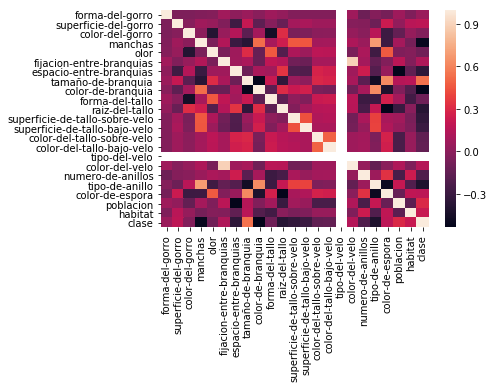

In [12]:
import seaborn as sns #matriz de correlacion entre variables
corr = df2.corr()
sns.heatmap(corr, 
          xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Al transformar a numeros los valores que eran letras sin sentido ordinal, el valor carece de sentido estadistico. Es decir un valor de 7 no es mayor ni menor que un 1. 
#### Sin embargo la matriz de correlacion en este caso sí nos sirve para darnos cuenta que la variable 'tipo-del-velo' es llamativa 

In [13]:
df2['tipo-del-velo'].value_counts #vemos que toma un único valor, no nos sirve.
df = df.drop(columns=['tipo-del-velo']) # dropeamos la variable del df original con el que vamos a trabajar.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
forma-del-gorro                   8124 non-null object
superficie-del-gorro              8124 non-null object
color-del-gorro                   8124 non-null object
manchas                           8124 non-null object
olor                              8124 non-null object
fijacion-entre-branquias          8124 non-null object
espacio-entre-branquias           8124 non-null object
tamaño-de-branquia                8124 non-null object
color-de-branquia                 8124 non-null object
forma-del-tallo                   8124 non-null object
raiz-del-tallo                    8124 non-null object
superficie-de-tallo-sobre-velo    8124 non-null object
superficie-de-tallo-bajo-velo     8124 non-null object
color-del-tallo-sobre-velo        8124 non-null object
color-del-tallo-bajo-velo         8124 non-null object
color-del-velo                    8124 non-null object
numero-de-ani

### Creamos las variables dummies para todas las Features, exceptuando la col Clase

In [14]:
df_solodummies = pd.get_dummies(df.loc[:, df.columns != 'clase']) #creo las dummies de features pero no quiero hacer dummie a la clase

In [15]:
df_soloclase = df.clase #creo un dataframe solo de la columna Clase

In [16]:
df1 = pd.concat([df_soloclase, df_solodummies],axis=1) #concateno los 2 df anteriores creadores para tener el df final

In [17]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, clase to habitat_w
dtypes: int8(1), uint8(116)
memory usage: 928.3 KB


#### Ahora el df tiene 117 columnas

## 2) Ahora con el Dataset pre-procesado, nos disponemos a tratalos con diferentes modelos de clasificación evaluando sus resultados

### Modelo PCA para reducir dimensionalidad

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Text(0,0.5,'Varianza explicada acumulada')

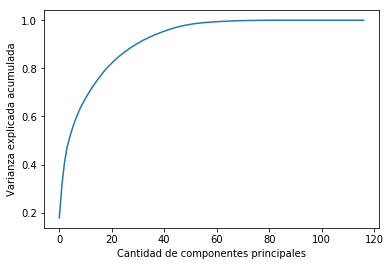

In [19]:
modelo_pca = PCA().fit(df1)
plt.plot(np.cumsum(modelo_pca.explained_variance_ratio_))
plt.xlabel('Cantidad de componentes principales')
plt.ylabel('Varianza explicada acumulada')

#### Podemos ver que con solo 5 componentes principales ya explicamos cerca del 50% de la variabilidad

#### Construimos la matriz de features "X", con todas las columnas del dataframe (previa creacion de dummies), excepto la de clases

In [20]:
X = df1.loc[:, df1.columns != 'clase']
y = df1['clase']

In [21]:
model=PCA(n_components=5)
X_pca=model.fit_transform(X) 
X_pca.shape

(8124, 5)

In [22]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X=scaler.fit_transform(X)

In [23]:
print(model.explained_variance_) #Esta es la varianza explicada por los primeros 5 componentes

[1.91529498 1.58248589 1.11025961 0.72242369 0.45784238]


In [24]:
model.explained_variance_ratio_

array([0.16810879, 0.13889755, 0.09744943, 0.06340839, 0.04018563])

In [25]:
#pd.DataFrame(X_pca)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state=12)

#### Para aplicar la transformación PCA se debe primero hacer el split antes del fit.Sino el modelo estaría considerando para el caluclo de los componentes principales observaciones que pertenecen al set de test.Estaría conociendo información extra. 

#### Los valores de y_train e y_test no los transformo ya que son categoricos 1 y 0

In [27]:
model=PCA(n_components=5)
X_train_pca=model.fit_transform(X_train) 
X_test_pca=model.transform(X_test)

### Ahora hecho el split para entrenamiento, vamos a correr 3 modelos con X transformada por PCA considerando solo sus 5 componentes principales.

## Modelo de Regresión Logística

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

No es necesrio standarizar las variables, ya que los componentes principales se mantienen en la misma escala.

In [29]:
lg = linear_model.LogisticRegression()

lg.fit(X_train_pca, y_train)

#X_test_scaled = scaler.transform(X_test)

#y_pred_train = lg.predict(X_train)

y_pred_test = lg.predict(X_test_pca)

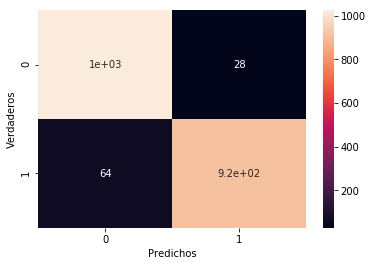

In [30]:
#Elaboramos la matriz de confusión:

#confusion_matrix(y_test, y_pred_test)

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [31]:
# Calculamos el accuracy

accuracy_score(y_test, y_pred_test)

0.9547021171836534

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1052
          1       0.97      0.93      0.95       979

avg / total       0.96      0.95      0.95      2031



### Modelo KNN: Vecinos mas cercanos

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#### No será necesario standarizar los valores ya que no hay problema de escala al trabajar con la matriz de componentes.

In [34]:
# Calculamos nuevamente los scores de cross validation sobre los features
from sklearn.model_selection import cross_val_score
scores_para_df_standar = []
for i in range(1,2000,100):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model_knn, X_train_pca, y_train, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [35]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head(20) #Dan numeros muy buenos, hay que dudar?

,n_neighbours,score_medio,score_std
0,1,0.998851,0.000837
1,101,0.982110,0.002669
2,201,0.960774,0.004069
3,301,0.951911,0.003979
4,401,0.941736,0.003332
5,501,0.930578,0.005233
6,601,0.920730,0.004518
7,701,0.915314,0.004820
8,801,0.911704,0.006103
9,901,0.896612,0.019407


In [36]:
# Armamos los límites para graficar
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']

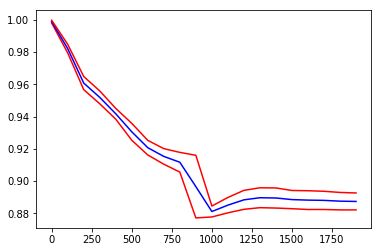

In [37]:
# Buscamos gráficamente el valor ópitmo para n_neighbors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

### Como se puede ver, la tendencia es cuanto mas bajo es K el score es mayor, esto quiere decir que el mejor caso es el K=1, que significa tomar la clase del vecino mas cercano. 

### la conclusión es que las clases se encuentran muy separadas entre si y no están mezcladas. 

In [38]:
df_scores_standar.loc[df_scores_standar.score_medio == df_scores_standar.score_medio.max()]

,n_neighbours,score_medio,score_std,limite_superior,limite_inferior
0,1,0.998851,0.000837,0.999688,0.998013


In [39]:
#no tiene errores si se considera el k=1 es decir el único vecino mas cercano. 
best_k = df_scores_standar.loc[df_scores_standar.score_medio == df_scores_standar.score_medio.max(),'n_neighbours'].values
best_k = best_k[0]
best_k

1

In [40]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model_knn = KNeighborsClassifier(n_neighbors=best_k)
# Lo ajustamos sobre datos de entrenamiento
model_knn.fit(X_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
# Lo utilizamos para predecir en test
#X_test = scaler.transform(X_test) si uso el scaler deberia tambien normalizar el X_train, al ser dummies no necesita.
y_pred_test_knn = model_knn.predict(X_test_pca)

In [42]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test_knn)

array([[1052,    0],
       [   0,  979]], dtype=int64)

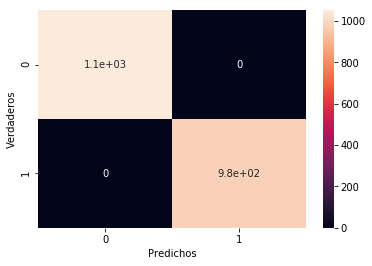

In [43]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_test_knn), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [44]:
# Calculamos el accuracy

accuracy_score(y_test, y_pred_test_knn)

1.0

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_test_knn))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1052
          1       1.00      1.00      1.00       979

avg / total       1.00      1.00      1.00      2031



El modelo es performa perfecto como clasificador bajo el modelo KNN con k=1

## Modelo: Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
model_gauss = GaussianNB()
model_gauss.fit(X_train_pca, y_train)
y_pred_test_gauss = model_gauss.predict(X_test_pca)

Text(0.5,15,'Predichos')

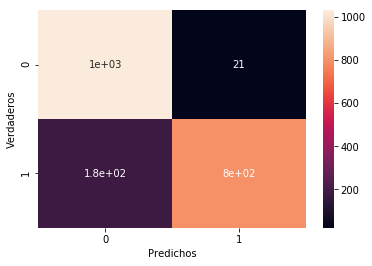

In [47]:
confusion_matrix(y_test, y_pred_test_gauss)
sns.heatmap(confusion_matrix(y_test, y_pred_test_gauss), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

In [48]:
# Calculamos el accuracy

accuracy_score(y_test, y_pred_test_gauss)

0.9010339734121122

In [49]:
print(classification_report(y_test, y_pred_test_gauss))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91      1052
          1       0.97      0.82      0.89       979

avg / total       0.91      0.90      0.90      2031



Para el modelo Gaussian Naive Bayes, se ve que aun performando muy bien no alcanza valores como los anteriores. Probablemente se deba a el supuesto Naive de que los registros de la muestran provienen de una distribución gaussiana y no es exactamente asi. 

## Probamos ahora los modelos para nuestro set ya convertido en dummies pero sin aplicar PCA

En este caso al utilizar un set de variables dummies, no vamos a aplicar KNN ya que la medición eclideana no tendria sentido matematico con el problema. 

Preparación del dataset: eliminación de K-1 variables dummies por variable original del problema. Para evitar problema de colinealidad

#### Creo df2 haciendo un get_dummies con drop first

In [50]:
df2_solodummies = pd.get_dummies(df.loc[:, df.columns != 'clase'], drop_first=True)
df2_soloclase = df.clase #creo un dataframe solo de la columna Clase
df2 = pd.concat([df2_soloclase, df2_solodummies],axis=1) #concateno los 2 df anteriores creadores para tener el df final
df2.sample()

,clase,forma-del-gorro_c,forma-del-gorro_f,forma-del-gorro_k,forma-del-gorro_s,forma-del-gorro_x,superficie-del-gorro_g,superficie-del-gorro_s,superficie-del-gorro_y,color-del-gorro_c,...,poblacion_n,poblacion_s,poblacion_v,poblacion_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3943,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Podemos ver que se redujeron la cantidad de columnas de 117 a 96

In [51]:
X2 = df2.loc[:, df2.columns != 'clase']
# la variable "y" no cambia. 

Hacemos el split:

In [52]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, stratify= y, random_state=12)

## Regresion Logistica

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [54]:
lg = linear_model.LogisticRegression()

lg.fit(X2_train, y2_train)

#X_test_scaled = scaler.transform(X_test)

#y_pred_train = lg.predict(X_train)

y2_pred_test = lg.predict(X2_test)

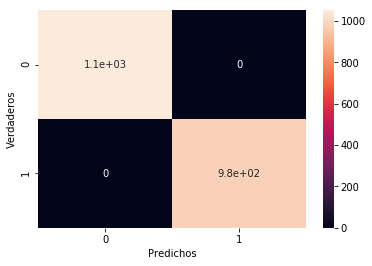

In [55]:
sns.heatmap(confusion_matrix(y2_test, y2_pred_test), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [56]:
# Calculamos el accuracy

accuracy_score(y2_test, y2_pred_test)

1.0

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y2_test, y2_pred_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1052
          1       1.00      1.00      1.00       979

avg / total       1.00      1.00      1.00      2031



#### Da un score perfecto el modelo de Regresion Logistica, lo cual es lógico si pensamos que anteriormente tomando solo 5 componentes principales ya medía un score de 0,95; tomando todas las variables deberia ser mayor.

## Modelo Bernoulli Naive Bayes

In [58]:
from sklearn.naive_bayes import BernoulliNB
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X2_train, y2_train)
y2_pred_test_bernoulli = model_bernoulli.predict(X2_test)

Text(0.5,15,'Predichos')

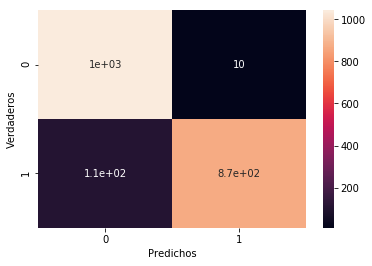

In [59]:
confusion_matrix(y2_test, y2_pred_test_bernoulli)
sns.heatmap(confusion_matrix(y2_test, y2_pred_test_bernoulli), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

In [60]:
#Calculamos el accuracy

accuracy_score(y2_test, y2_pred_test_bernoulli)

0.9423929098966026

In [61]:
print(classification_report(y2_test, y2_pred_test_bernoulli))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      1052
          1       0.99      0.89      0.94       979

avg / total       0.95      0.94      0.94      2031



#### Concluimos que nuevamente se mejoró el resultado obteniendo un 0,94 de accuracy respecto del 0,90 que habiamos obtenido con el Gaussian Naive bayes aplicando PCA para 5 componentes. 

## Comparación de las métricas de los 5 modelos que corrimos

Dado que nuestro en nuestro análisis estamos clasificando si un hongo es venenoso (clase=1) o comestible (clase=0), lo fundamental es tener el error mas bajo de clasificar como comestible un hongo que en realidad es venenoso. 

Es decir tenemos que hacer foco en los Falsos Negativos, buscando que sean lo mas bajo posible. 

La métrica que nos ayuda a visualizar esto es el Recall. Buscaremos que su valor sea el mas alto posible para que la proporción de Falsos Negativos sea muy baja. 

#### PCA + Regresión Logistica 

In [62]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1052
          1       0.97      0.93      0.95       979

avg / total       0.96      0.95      0.95      2031



#### PCA + KNN 

In [63]:
print(classification_report(y_test, y_pred_test_knn))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1052
          1       1.00      1.00      1.00       979

avg / total       1.00      1.00      1.00      2031



#### PCA + Gaussian NB

In [64]:
print(classification_report(y_test, y_pred_test_gauss))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91      1052
          1       0.97      0.82      0.89       979

avg / total       0.91      0.90      0.90      2031



#### Regresión Logística

In [65]:
print(classification_report(y2_test, y2_pred_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1052
          1       1.00      1.00      1.00       979

avg / total       1.00      1.00      1.00      2031



#### Bernoulli NB

In [66]:
print(classification_report(y2_test, y2_pred_test_bernoulli))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      1052
          1       0.99      0.89      0.94       979

avg / total       0.95      0.94      0.94      2031



### Mirando los valores de Recall, y buscando maximizarlos, si bien los valores son muy altos para todos ellos, aquellos modelos que tienen valor 1 perfoman perfecto.

##### PCA + KNN 

##### Regresión Logística

Ahora bien para los otros restantes 3 modelos que pueden perfeccionarse, las alternativas son: 
    
Aumentar los componentes a considerar en los modelos donde se aplicó PCA y así aumentar la dimensionalidad, reduciendo la variabilidad no explicada por el modelo (es lo mismo que aumentando la variabilidad explicada)

Tunear los Hiperparámetros, por ejemplo variando el umbral.

Tomamos por ejemplo el caso de Bernoulli Naive Bayes. 

Si buscamos aumentar el recall, reduciendo los casos de Falsos Negativos, necesitamos reducir el valor por default del umbral. 

Es decir que ante una probabilidad baja de que sea venenoso ya me lo clasifique como tal, y reducir el riesgo que lo clasifique como comestible

In [67]:
# En primer lugar, obtengamos las predicciones de probabilidad p(y=1). Estos serían los resultados de la clase con que clasificó cada registro
model_bernoulli.predict(X2_test)

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [68]:
model_bernoulli.predict_proba(X2_test) 

#Notar que el método predict_proba nos devuelve una array en el cual aparecen dos probabilidades de cada instancia del test set:  p(y=0)  y p(y=1) , en ese orden.

# A nosotros nos interesa aumentar las predicciones de venenosos, es decir ponernos mas conservadores, para tener menos riesgo aun acosta de predecir como venenoso cuando no lo es.

array([[5.43010255e-16, 1.00000000e+00],
       [1.08067248e-15, 1.00000000e+00],
       [1.33228578e-07, 9.99999867e-01],
       ...,
       [9.99999267e-01, 7.32597286e-07],
       [9.99999857e-01, 1.42771212e-07],
       [9.99992190e-01, 7.81003282e-06]])

In [69]:
y_probs_logit = model_bernoulli.predict_proba(X2_test)
y_probs_logit_left = y_probs_logit[:,1]

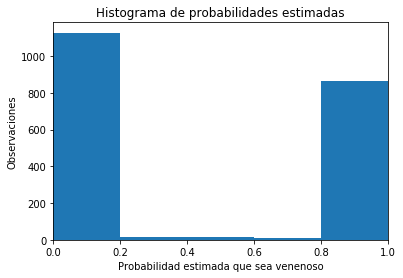

In [70]:
# 5 bins
plt.hist(y_probs_logit_left, bins=5)

# x-axis de 0 a 1
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada que sea venenoso')
plt.ylabel('Observaciones')
plt.show()

#### Optamos por bajar el umbral de 0.5 a 0.1 para reducir el error. 

In [71]:
from sklearn.preprocessing import binarize
y_pred_logit = binarize(y_probs_logit, 0.1)[:,1]

# Otra forma
#y_pred_logit = (y_probs_logit_left > 0.1)

In [72]:
confusion_matrix(y2_test,y_pred_logit)

array([[1035,   17],
       [  77,  902]], dtype=int64)

In [73]:
print('Recall umbral 0.5=', recall_score(y2_test, y2_pred_test_bernoulli))
print('Recall umbral 0.1=', recall_score(y2_test, y_pred_logit)) #al bajar el umbral performa mejor

Recall umbral 0.5= 0.8907048008171604
Recall umbral 0.1= 0.9213483146067416


#### Como se concluye, al bajar a 0,1 el umbral mejoramos el recall en un 3% de Bernoulli NB

### Curva ROC para Bernoulli NB

In [74]:
fpr_log,tpr_log,thr_log = roc_curve(y2_test, y_probs_logit[:,1])

In [75]:
df4 = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

In [79]:
df4

,fpr,tpr,thr
0,0.000000,0.224719,1.000000e+00
1,0.000000,0.271706,1.000000e+00
2,0.000000,0.293156,1.000000e+00
3,0.000000,0.307457,1.000000e+00
4,0.000000,0.312564,1.000000e+00
5,0.000000,0.320735,1.000000e+00
6,0.000000,0.321757,1.000000e+00
7,0.000000,0.324821,1.000000e+00
8,0.000000,0.332993,1.000000e+00
9,0.000000,0.339122,1.000000e+00


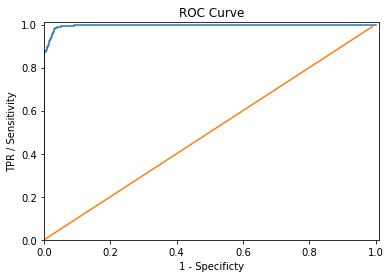

In [77]:
import matplotlib.pyplot as plt
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df4['fpr'],df4['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [78]:
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.9966317379804798
